# **Import Python Libraries**

Reference: Tutorials in Sinhala (Native Language) - https://www.youtube.com/watch?v=A7d_yQ4ECNE&list=PL495mke12zYDHN9ONfcal1eQfo8VqmOgu

Main reference: https://github.com/nishitpatel01/Fake_News_Detection

In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix
import nltk.corpus 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

from multiprocessing import Pool
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import pickle
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.




---



# **Read the datasets**
Training Dataset, Test Dataset and Final Dataset retrieved from: https://github.com/nishitpatel01/Fake_News_Detection

In [3]:
test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)

train_news.columns
test_news.columns
valid_news.columns

Index(['Statement', 'Label'], dtype='object')



---



# **Data Pre-processing**
**Cleaning dataset**

In [4]:
nltk.download('wordnet')
nltk.download('stopwords')

# Define stop words to remove from text
stop_words = set(stopwords.words('english'))

# Define the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Drop rows with missing values, Code reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html, https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a
train_news.dropna(inplace=True)
test_news.dropna(inplace=True)
valid_news.dropna(inplace=True)

# Clean the text in the 'text' column of each dataset using lemmatization and stemming
for dataset in [train_news, test_news, valid_news]:
    dataset['Statement1'] = dataset['Statement'].apply(lambda x: ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in x.split() if word not in stop_words]))

# Save the cleaned datasets to new CSV files
train_news.to_csv('cleaned_train.csv', index=False)
test_news.to_csv('cleaned_test.csv', index=False)
valid_news.to_csv('cleaned_valid.csv', index=False)

print("\nCleaning datasets")
# Length of news article text
print("\nTraining Dataset--->")
print("Old length: ", len(train_news.Statement))
print("New length: ", len(train_news.Statement1))

print("\nTesting Dataset--->")
print("Old length: ", len(test_news.Statement))
print("New length: ", len(test_news.Statement1))

print("\nFinal Dataset--->")
print("Old length: ", len(valid_news.Statement))
print("New length: ", len(valid_news.Statement1))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Cleaning datasets

Training Dataset--->
Old length:  10240
New length:  10240

Testing Dataset--->
Old length:  2551
New length:  2551

Final Dataset--->
Old length:  1284
New length:  1284


It is possible that some common words such as "say" and "the" may still appear in the dataset after cleaning, even if stop words have been removed and lemmatization and stemming have been performed. This is because these words may still be necessary for the meaning of the text, and removing them could alter the original meaning of the sentences.

Stop words are commonly removed from text because they are common words that generally do not add any significant meaning to the text. However, some stop words may still be necessary for the grammatical structure and flow of the sentences. For example, "the" is a commonly used article in English that helps to identify and specify nouns. Removing it could make the text difficult to read or even change the meaning of a sentence.

Similarly, lemmatization and stemming aim to reduce the variation in the text by reducing words to their base form or a common stem. However, this process may not always completely eliminate the variation in the text, and some variation may still remain. Additionally, some words may have multiple meanings and different forms that cannot be easily reduced to a single base form or stem.



---



# **View the Datasets**
This step is carried out to get a basic idea about the dataset.

In [5]:
def data_info():
  # Information of the dataset files
  print("Information of Dataset files:")
  print("\n*************************************")

  # this dataset will be used to train the model
  print("Shape of Training Dataset:", train_news.shape)
  print("\n*************************************")
  print("First 5 Rows of Training Dataset:")
  print(train_news.head(5))
  print("\n*************************************")

  # the below datasets will be used for testing and validation purposes
  print("Shape of Test Dataset:", test_news.shape)
  print("\n*************************************")
  print("First 5 Rows of Test Dataset:")
  print(test_news.head(5))
  print("\n*************************************")
  
  print("Shape of Final Dataset:", valid_news.shape)
  print("\n*************************************")
  print("First 5 Rows of Final Dataset:")
  print(valid_news.head(5))
  print("\n*************************************")

***Calling the function data_info()***

In [6]:
#call the function data_info()
data_info()

Information of Dataset files:

*************************************
Shape of Training Dataset: (10240, 3)

*************************************
First 5 Rows of Training Dataset:
                                           Statement  Label  \
0  Says the Annies List political group supports ...  False   
1  When did the decline of coal start? It started...   True   
2  Hillary Clinton agrees with John McCain "by vo...   True   
3  Health care reform legislation is likely to ma...  False   
4  The economic turnaround started at the end of ...   True   

                                          Statement1  
0  say anni list polit group support third-trimes...  
1  when declin coal start? it start natur ga took...  
2  hillari clinton agre john mccain "bi vote give...  
3  health care reform legisl like mandat free sex...  
4              the econom turnaround start end term.  

*************************************
Shape of Test Dataset: (2551, 3)

*************************************




---



# **Data Distribution**
This section shows the data distribution in the 3 different datasets in a graphical view using Seaborn countplot.

In [7]:
# Creates a data distribution plot using seaborn countplot. Code reference: https://seaborn.pydata.org/generated/seaborn.countplot.html, https://seaborn.pydata.org/generated/seaborn.color_palette.html
def data_distribution(dataFile):
  print("\nData Distribution\n")
  # Use seaborn countplot to create the data distribution plot.
  plt.figure(figsize=(4, 3))
  return sns.countplot(x='Label', data=dataFile, palette="pastel6")


Data Distribution



<Axes: xlabel='Label', ylabel='count'>

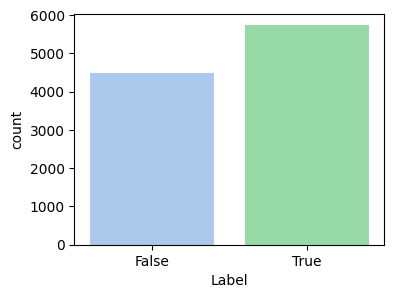

In [8]:
#call the function data_distribution() for training dataset
data_distribution(train_news)


Data Distribution



<Axes: xlabel='Label', ylabel='count'>

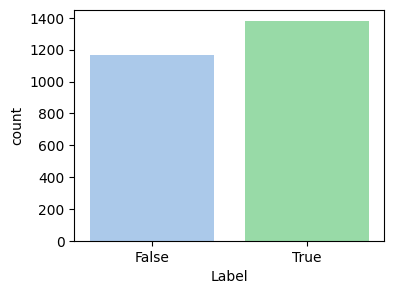

In [9]:
#call the function data_distribution() for testing dataset
data_distribution(test_news)


Data Distribution



<Axes: xlabel='Label', ylabel='count'>

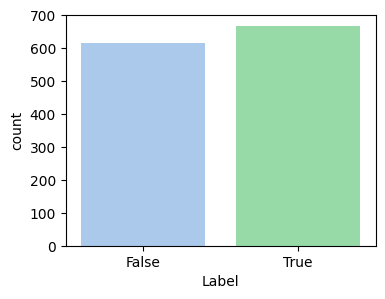

In [10]:
#call the function data_distribution() for final dataset
data_distribution(valid_news)

The above step is carried out to view the distribution of training, test and valid data and it seems the dataset is failry evenly distributed between the classes



---



# **Data integrity check**
This is to check whether there are any null values in the datasets.

In [11]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
# Print out the number of null values for each column in the train_news dataset using the isnull() method.
print("Checking data qualitites of Training Dataset")
print("\n*************************************")
print(train_news.isnull().sum())

# Print out the data types of each column in the train_news dataset using the info() method.
train_news.info()

print("\nFinished checking...")
print("\n*************************************")
print("Checking data qualitites of Testing Dataset")
print("\n*************************************")

# Print out the number of null values for each column in the test_news dataset using the isnull() method.
print(test_news.isnull().sum())

# Print out the data types of each column in the test_news dataset using the info() method.
test_news.info()

print("\nFinished checking...")
print("\n*************************************")
print("Checking data qualitites of Final Dataset")
print("\n*************************************")

# Print out the number of null values for each column in the valid_news dataset using the isnull() method.
print(valid_news.isnull().sum())

# Print out the data types of each column in the valid_news dataset using the info() method.
valid_news.info()

print("\nFinished checking...")
print("\n*************************************")


Checking data qualitites of Training Dataset

*************************************
Statement     0
Label         0
Statement1    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Statement   10240 non-null  object
 1   Label       10240 non-null  bool  
 2   Statement1  10240 non-null  object
dtypes: bool(1), object(2)
memory usage: 170.1+ KB

Finished checking...

*************************************
Checking data qualitites of Testing Dataset

*************************************
Statement     0
Label         0
Statement1    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Statement   2551 non-null   object
 1   Label       2551 non-null   bool  
 2   Statement1  2551 non

***There are no null values in the dataset so there is no need to clean the dataset.***



---



# **Count Vectorizer**
CountVectorizer is a text preprocessing technique used to transform text data into numerical feature vectors that can be used as input for machine learning models.

In [12]:
# initialize CountVectorizer, Code Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
countV = CountVectorizer()

# transform the training data to a matrix of token counts
# Theory Reference: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
# Code Reference: https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/
train_count_vect = countV.fit_transform(train_news['Statement'].values)

# print a message indicating that we are printing the training count matrix
print("Train Count")

# print the training count matrix
print(train_count_vect)

Train Count
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1




---



***Word Cloud using Count Vectorizer***

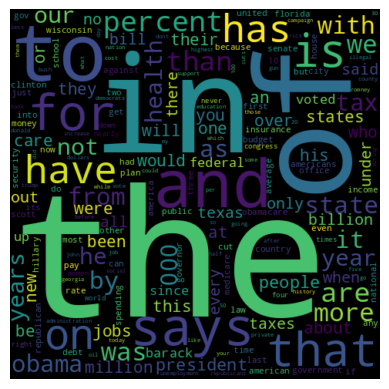

In [13]:
# get the vocabulary from the TfidfVectorizer
# Referred but changed the code according to project requirements.
# Code Reference: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb
vocab = countV.get_feature_names_out()

# convert train_count_countv to a sparse matrix
train_count_vect = csr_matrix(train_count_vect)

# create a dictionary mapping words to their tf-idf scores
def compute_countv(i):
    return vocab[i], train_count_vect[:, i].sum()

with Pool() as p:
    result = p.map(compute_countv, range(len(vocab)))
word_countv = dict(result)

# generate the word cloud
wordcloud1 = WordCloud(width=480, height=480, background_color="black").generate_from_frequencies(word_countv)

# plot the word cloud
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

This below is to get a general idea about how the count vectorizer looks.

In [14]:
def get_countVectorizer_stats():
    
    #Size of the vocabular
    train_count_vect.shape

    #check vocabulary using below command
    print("Word Count:")
    print(countV.vocabulary_)
    print("\n*************************************")
    
    #get feature names
    print("Get Feature Names:")
    print(countV.get_feature_names_out()[:100])
    print("\n*************************************")

***Call the function get_countVectorizer_stats()***

In [15]:
get_countVectorizer_stats()

Word Count:
{'says': 9676, 'the': 10988, 'annies': 1044, 'list': 6639, 'political': 8376, 'group': 5115, 'supports': 10709, 'third': 11036, 'trimester': 11296, 'abortions': 615, 'on': 7728, 'demand': 3278, 'when': 11934, 'did': 3434, 'decline': 3185, 'of': 7672, 'coal': 2475, 'start': 10425, 'it': 6052, 'started': 10426, 'natural': 7418, 'gas': 4860, 'took': 11138, 'off': 7674, 'that': 10980, 'to': 11110, 'begin': 1532, 'in': 5687, 'president': 8554, 'george': 4910, 'bushs': 1964, 'administration': 751, 'hillary': 5401, 'clinton': 2444, 'agrees': 856, 'with': 12027, 'john': 6133, 'mccain': 6967, 'by': 1989, 'voting': 11748, 'give': 4954, 'bush': 1962, 'benefit': 1569, 'doubt': 3684, 'iran': 5999, 'health': 5310, 'care': 2096, 'reform': 9099, 'legislation': 6502, 'is': 6014, 'likely': 6605, 'mandate': 6834, 'free': 4735, 'sex': 9923, 'change': 2256, 'surgeries': 10721, 'economic': 3842, 'turnaround': 11351, 'at': 1259, 'end': 3990, 'my': 7374, 'term': 10939, 'chicago': 2313, 'bears': 15



---



# **TfidfVectorizer**
Convert into numerical using TfidfVectorizer

In [16]:
#Create a TfidfVectorizer object and specify stop words, ngram range, use_idf and smooth_idf parameters, Code Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

# transform the training data to a matrix of token counts
# Theory Reference: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
# Code Reference: https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/
train_count_ngram = tfidf_ngram.fit_transform(train_news['Statement'].values)

print("Train Count")
print(train_count_ngram)
print("\n*************************************")

Train Count
  (0, 203000)	0.19759109853514537
  (0, 89931)	0.19759109853514537
  (0, 154027)	0.19759109853514537
  (0, 117613)	0.19759109853514537
  (0, 20173)	0.19759109853514537
  (0, 180025)	0.19759109853514537
  (0, 215057)	0.19759109853514537
  (0, 202999)	0.19759109853514537
  (0, 89930)	0.19759109853514537
  (0, 154026)	0.19759109853514537
  (0, 117612)	0.19759109853514537
  (0, 20172)	0.19759109853514537
  (0, 180024)	0.19759109853514537
  (0, 12352)	0.18919405061075706
  (0, 215056)	0.18919405061075706
  (0, 202998)	0.19759109853514537
  (0, 89927)	0.18919405061075706
  (0, 154023)	0.18919405061075706
  (0, 117611)	0.19759109853514537
  (0, 20171)	0.19759109853514537
  (0, 180023)	0.19759109853514537
  (0, 59886)	0.15729194467105467
  (0, 12330)	0.13357663440955522
  (0, 215055)	0.18919405061075706
  (0, 202839)	0.12366726015635893
  :	:
  (10239, 165689)	0.14405234291505115
  (10239, 117011)	0.14405234291505115
  (10239, 201260)	0.14405234291505115
  (10239, 220439)	0.1440523

***Word Cloud using TfidfVectorizer***

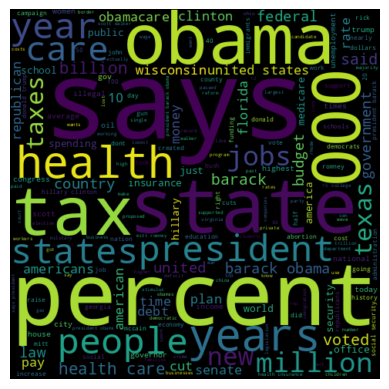

In [17]:
# get the vocabulary from the TfidfVectorizer
# Referred but changed the code according to project requirements.
# Code Reference: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb
vocab = tfidf_ngram.get_feature_names_out()

# convert train_count_ngram to a sparse matrix
train_count_ngram = csr_matrix(train_count_ngram)

# create a dictionary mapping words to their tf-idf scores
def compute_tfidf(i):
    return vocab[i], train_count_ngram[:, i].sum()

with Pool() as p:
    result = p.map(compute_tfidf, range(len(vocab)))
word_tfidf = dict(result)

# generate the word cloud
wordcloud2 = WordCloud(width=480, height=480, background_color="black").generate_from_frequencies(word_tfidf)

# plot the word cloud
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

This below is to get a general idea about how the Tfidf vectorizer looks.

In [18]:
def get_tfidfvec_stats():
    
    #Size of the vocabular
    train_count_ngram.shape

    #check vocabulary using below command
    print("Word Count:")
    print(tfidf_ngram.vocabulary_)
    print("\n*************************************")
    
    #get feature names
    print("Get Feature Names:")
    print(tfidf_ngram.get_feature_names_out()[:100])
    print("\n*************************************")

***Call the function get_tfidfvec_stats()***

In [19]:
get_tfidfvec_stats()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['00' '00 2014' '00 2014 provisions' '00 2014 provisions incorporated'
 '00 spent' '00 spent wages' '000' '000 000' '000 000 isner'
 '000 000 isner mahut' '000 000 send' '000 000 send community'
 '000 000 state' '000 000 state school' '000 000 support'
 '000 000 support supreme' '000 000 weapons' '000 000 weapons firearms'
 '000 10' '000 10 000' '000 10 000 refugees' '000 11' '000 11 percent'
 '000 11 percent years' '000 12' '000 12 000' '000 12 000 state' '000 20'
 '000 20 000' '000 20 000 infrastructural' '000 20 000 jobs'
 '000 20 million' '000 20 million acres' '000 200' '000 200 000'
 '000 200 000 year' '000 25' '000 25 000' '000 25 000 federal' '000 30'
 '000 30 000' '000 30 000 isis' '000 300' '000 300 000' '000 300 000 hate'
 '000 35' '000 35 000' '000 35 000 people' '000 38' '000 38 000'
 '000 38 000 earned' '000 40' '000 40 000' '000 40 000 50'
 '000 40 000 year' '000 400' '000 400 000' '000 400 000 military' '000 50'
 '000 50 000' '000 50 000 votes' '000 50 000 year' '000 50



---



# **Building Models using Bag of Words Technique (Count Vectorizer)**

Note: The pipeline function in Python is used to eliminate multiple steps of code. Multiple transformation in one go.

The pipeline object is then fit on the training set using the 'fit' method, which trains the model on the training data. The fitted pipeline is then used to make predictions on the test set using the 'predict' method.

Pipeline - Code Reference: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Pickle - Code Reference: https://pythonprogramming.net/python-pickle-module-save-objects-serialization/

Classification Report - Code Reference: https://thecleverprogrammer.com/2021/07/07/classification-report-in-machine-learning/

Same code used in all 12 models

**1. Naive Bayes**

In [20]:
#Define a pipeline object for Naive Bayes classification
nb_pipeline = Pipeline([
('NBCV',countV), # Use CountVectorizer to convert text to numerical features
('nb_clf',MultinomialNB()) # Use Multinomial Naive Bayes as the classifier
])

#Fit the pipeline on the training set
nb_pipeline.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_nb = nb_pipeline.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_cv_nb = np.mean(predicted_nb == test_news['Label'])
print("Naive Bayes - CV - Accuracy: ", acc_cv_nb)
print("Naive Bayes - CV - Accuracy Percentage: ", "{:.2%}".format(acc_cv_nb))

# Calculate F1-score and print it
f1_cv_nb = f1_score(test_news['Label'], predicted_nb, average='weighted')
print("Naive Bayes - CV - F1-score: ", f1_cv_nb)

with open('pkl_cv_nb.pkl', 'wb') as f:
    pickle.dump(nb_pipeline, f)

print("Pickle file *pkl_cv_nb.pkl* is ready")

Naive Bayes - CV - Accuracy:  0.6072128577028616
Naive Bayes - CV - Accuracy Percentage:  60.72%
Naive Bayes - CV - F1-score:  0.6026211015157216
Pickle file *pkl_cv_nb.pkl* is ready


**Accuracy** - The Model created based on Count Vectorizer tokenizer and Naive Bayes classifier produces **60.7%** of accuracy in predicting news as true news. 

***Classification Report***

In [21]:
print(classification_report(test_news['Label'], predicted_nb))

              precision    recall  f1-score   support

       False       0.58      0.49      0.53      1169
        True       0.62      0.70      0.66      1382

    accuracy                           0.61      2551
   macro avg       0.60      0.60      0.60      2551
weighted avg       0.60      0.61      0.60      2551



**2. Logistic Regression**

In [22]:
#Define a pipeline object for Logistic Regression classification
logR_pipeline = Pipeline([
        ('LogRCV',countV), # Use CountVectorizer to convert text to numerical features
        ('LogR_clf',LogisticRegression()) # Use Logistic Regression as the classifier
        ])

#Fit the pipeline on the training set
logR_pipeline.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_LogR = logR_pipeline.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_cv_LogR = np.mean(predicted_LogR == test_news['Label'])
print("Logistic Regression - CV - Accuracy: ", acc_cv_LogR)
print("Logistic Regression - CV - Accuracy Percentage: ", "{:.2%}".format(acc_cv_LogR))

# Calculate F1-score and print it
f1_cv_logR = f1_score(test_news['Label'], predicted_LogR, average='weighted')
print("Logistic Regression - CV - F1-score: ", f1_cv_logR)

with open('pkl_cv_logR.pkl', 'wb') as f:
    pickle.dump(logR_pipeline, f)

print("Pickle file *pkl_cv_logR.pkl* is ready")

Logistic Regression - CV - Accuracy:  0.6013328106624853
Logistic Regression - CV - Accuracy Percentage:  60.13%
Logistic Regression - CV - F1-score:  0.5993077894298117
Pickle file *pkl_cv_logR.pkl* is ready


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Accuracy** - The Model created based on Count Vectorizer tokenizer and Logistic Regression classifier produces **60.1%** of accuracy in predicting news as true news. 

***Classification Report***

In [23]:
print(classification_report(test_news['Label'], predicted_LogR))

              precision    recall  f1-score   support

       False       0.57      0.52      0.54      1169
        True       0.62      0.67      0.65      1382

    accuracy                           0.60      2551
   macro avg       0.60      0.60      0.60      2551
weighted avg       0.60      0.60      0.60      2551



**3. SVM - Support Vector Machines**

In [24]:
#Define a pipeline object for SVM classification
svm_pipeline = Pipeline([
        ('svmCV',countV), # Use CountVectorizer to convert text to numerical features
        ('svm_clf',svm.LinearSVC()) # Use SVM as the classifier
        ])

#Fit the pipeline on the training set
svm_pipeline.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_svm = svm_pipeline.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_cv_svm = np.mean(predicted_svm == test_news['Label'])
print("SVM - CV - Accuracy: ", acc_cv_svm)
print("SVM - CV - Accuracy Percentage: ", "{:.2%}".format(acc_cv_svm))

# Calculate F1-score and print it
f1_cv_svm = f1_score(test_news['Label'], predicted_svm, average='weighted')
print("SVM - CV - F1-score: ", f1_cv_svm)

with open('pkl_cv_svm.pkl', 'wb') as f:
    pickle.dump(svm_pipeline, f)

print("Pickle file *pkl_cv_svm.pkl* is ready")

SVM - CV - Accuracy:  0.5723245785966288
SVM - CV - Accuracy Percentage:  57.23%
SVM - CV - F1-score:  0.5716723236660229
Pickle file *pkl_cv_svm.pkl* is ready


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Accuracy** - The Model created based on Count Vectorizer tokenizer and SVM classifier produces **57.2%** of accuracy in predicting news as true news. 

***Classification Report***

In [25]:
print(classification_report(test_news['Label'], predicted_svm))

              precision    recall  f1-score   support

       False       0.53      0.52      0.53      1169
        True       0.60      0.62      0.61      1382

    accuracy                           0.57      2551
   macro avg       0.57      0.57      0.57      2551
weighted avg       0.57      0.57      0.57      2551



**4. SGD Classifier - Stochastic Gradient Descent**

In [26]:
#Define a pipeline object for SGD classification
sgd_pipeline = Pipeline([
        ('sgdCV',countV), # Use CountVectorizer to convert text to numerical features
        ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3)) # Use SGD as the classifier
        ])

#Fit the pipeline on the training set
sgd_pipeline.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_sgd = sgd_pipeline.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_cv_sgd = np.mean(predicted_sgd == test_news['Label'])
print("SGD - CV - Accuracy: ", acc_cv_sgd)
print("SGD - CV - Accuracy Percentage: ", "{:.2%}".format(acc_cv_sgd))

# Calculate F1-score and print it
f1_cv_sgd = f1_score(test_news['Label'], predicted_svm, average='weighted')
print("SGD - CV - F1-score: ", f1_cv_sgd)

with open('pkl_cv_sgd.pkl', 'wb') as f:
    pickle.dump(sgd_pipeline, f)

print("Pickle file *pkl_cv_sgd.pkl* is ready")

SGD - CV - Accuracy:  0.6076048608388868
SGD - CV - Accuracy Percentage:  60.76%
SGD - CV - F1-score:  0.5716723236660229
Pickle file *pkl_cv_sgd.pkl* is ready


**Accuracy** - The Model created based on Count Vectorizer tokenizer and SGD classifier produces **61.2%** of accuracy in predicting news as true news. 

***Classification Report***

In [27]:
print(classification_report(test_news['Label'], predicted_sgd))

              precision    recall  f1-score   support

       False       0.58      0.53      0.55      1169
        True       0.63      0.68      0.65      1382

    accuracy                           0.61      2551
   macro avg       0.60      0.60      0.60      2551
weighted avg       0.61      0.61      0.61      2551



**5. Random Forest**

In [28]:
#Define a pipeline object for Random Forest classification
rf_pipeline = Pipeline([
        ('rfCV',countV), # Use CountVectorizer to convert text to numerical features
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3)) # Use Random Forest as the classifier
        ])
    
#Fit the pipeline on the training set
rf_pipeline.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_rf = rf_pipeline.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_cv_rf = np.mean(predicted_rf == test_news['Label'])
print("Random Forest - CV - Accuracy: ", acc_cv_rf)
print("Random Forest - CV - Accuracy Percentage: ", "{:.2%}".format(acc_cv_rf))

# Calculate F1-score and print it
f1_cv_rf = f1_score(test_news['Label'], predicted_rf, average='weighted')
print("Random Forest - CV - F1-score: ", f1_cv_rf)

with open('pkl_cv_rf.pkl', 'wb') as f:
    pickle.dump(rf_pipeline, f)

print("Pickle file *pkl_cv_rf.pkl* is ready")

Random Forest - CV - Accuracy:  0.6260290082320659
Random Forest - CV - Accuracy Percentage:  62.60%
Random Forest - CV - F1-score:  0.6119665360601575
Pickle file *pkl_cv_rf.pkl* is ready


**Accuracy** - The Model created based on Count Vectorizer tokenizer and Random Forest classifier produces **62.4%** of accuracy in predicting news as true news. 

**Classification Report**

In [29]:
print(classification_report(test_news['Label'], predicted_rf))

              precision    recall  f1-score   support

       False       0.64      0.43      0.51      1169
        True       0.62      0.79      0.70      1382

    accuracy                           0.63      2551
   macro avg       0.63      0.61      0.60      2551
weighted avg       0.63      0.63      0.61      2551



**6. Passive Aggressive Classifier**

In [30]:
#Define a pipeline object for Passive Aggressive classification
passAgg_pipeline = Pipeline([
        ('PACV',countV), # Use CountVectorizer to convert text to numerical features
        ('pa_clf',PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None, early_stopping=False, fit_intercept=True, loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None, random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)) # Use Passive Aggressive as the classifier
        ])
    
#Fit the pipeline on the training set
passAgg_pipeline.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_pasAgg = passAgg_pipeline.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_cv_pasAgg = np.mean(predicted_pasAgg == test_news['Label'])
print("Passive Aggressive - CV - Accuracy: ", acc_cv_pasAgg)
print("Passive Aggressive - CV - Accuracy Percentage: ", "{:.2%}".format(acc_cv_pasAgg))

# Calculate F1-score and print it
f1_cv_passAgg = f1_score(test_news['Label'], predicted_pasAgg, average='weighted')
print("Passive Aggressive - CV - F1-score: ", f1_cv_passAgg)

with open('pkl_cv_passAgg.pkl', 'wb') as f:
    pickle.dump(passAgg_pipeline, f)

print("Pickle file *pkl_cv_passAgg.pkl* is ready")

Passive Aggressive - CV - Accuracy:  0.5762446099568796
Passive Aggressive - CV - Accuracy Percentage:  57.62%
Passive Aggressive - CV - F1-score:  0.5754807888395035
Pickle file *pkl_cv_passAgg.pkl* is ready


**Accuracy** - The Model created based on Count Vectorizer tokenizer and Passive Aggressive classifier produces **58.7%** of accuracy in predicting news as true news. 

**Classification Report**

In [31]:
print(classification_report(test_news['Label'], predicted_pasAgg))

              precision    recall  f1-score   support

       False       0.54      0.52      0.53      1169
        True       0.61      0.63      0.62      1382

    accuracy                           0.58      2551
   macro avg       0.57      0.57      0.57      2551
weighted avg       0.58      0.58      0.58      2551





---



# **Cross Validation**
**Building Confusion Matrix**

k-fold cross-validation is a technique used to assess the performance of a model by splitting the data into k equal-sized folds and training the model on k-1 folds while testing it on the remaining fold. This process is repeated k times, with each fold being used as the test set once.

The k-fold cross-validation technique helps to address the problem of overfitting by using all the available data for both training and testing, without sacrificing the ability to evaluate the performance of the model. It also provides a more accurate estimate of the model's performance than a single train-test split, as it uses multiple splits of the data.

Here's how k-fold cross-validation works:
Split the data into k equal-sized folds.
For each of the k folds:
a. Use k-1 folds for training the model.
b. Use the remaining fold for testing the model.
c. Evaluate the performance of the model on the test set.
Repeat the process k times, using each fold as the test set once.
Calculate the average performance across all k folds to get an estimate of the model's performance.

**K-fold Cross Validation for all classifiers**

In [32]:
# Code Reference: https://scikit-learn.org/stable/modules/cross_validation.html, coding referred but changed according to project requirements
def build_confusion_matrix(classifier):
    # Define KFold with 5 splits to reduce model mimicing the data, to maximize generalization the data
    k_fold = KFold(n_splits=5)

    # Create empty lists and arrays to store scores and confusion matrix
    f1_scores = []
    accuracy_scores = []
    confusion = np.array([[0,0],[0,0]])

    # Loop through the KFold splits
    for train_ind, test_ind in k_fold.split(train_news):
        # Split train and test data based on indices
        train_text = train_news.iloc[train_ind]['Statement'] 
        train_y = train_news.iloc[train_ind]['Label']
        test_text = train_news.iloc[test_ind]['Statement']
        test_y = train_news.iloc[test_ind]['Label']

        # Fit the classifier to the training data and make predictions on test data
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)

        # Calculate confusion matrix, F1 score, and accuracy for each split
        confusion += confusion_matrix(test_y,predictions)
        f1 = f1_score(test_y,predictions)
        f1_scores.append(f1)
        accuracy = accuracy_score(test_y, predictions)
        accuracy_scores.append(accuracy)

    print('Total statements classified:', len(train_news))
    print('F1-Score:', sum(f1_scores)/len(f1_scores))
    print('Accuracy:', sum(accuracy_scores)/len(accuracy_scores))
    print('Confusion matrix:')
    print(confusion)

**Closs Validate all models**

***Naive Bayes Classifier***

<Axes: >

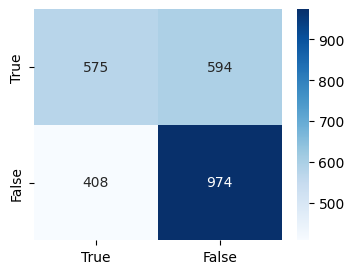

In [33]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_nb)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [34]:
print("Naive Bayes")
build_confusion_matrix(nb_pipeline)

Naive Bayes
Total statements classified: 10240
F1-Score: 0.66961153965076
Accuracy: 0.6060546875
Confusion matrix:
[[2118 2370]
 [1664 4088]]


***Logistic Regression Classifier***

<Axes: >

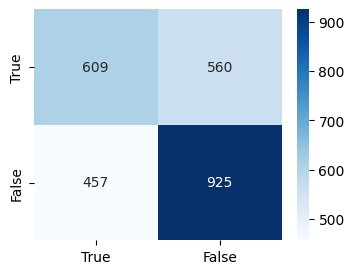

In [35]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_LogR)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [36]:
print("Logistic Regression")
build_confusion_matrix(logR_pipeline)

Logistic Regression


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Total statements classified: 10240
F1-Score: 0.6466692934443682
Accuracy: 0.5927734375
Confusion matrix:
[[2254 2234]
 [1936 3816]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***SVM Classifier***

<Axes: >

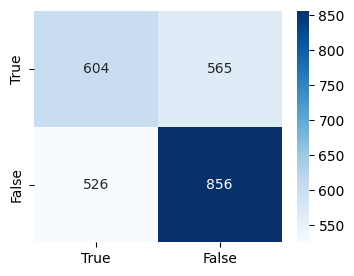

In [37]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_svm)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [38]:
print("SVM")
build_confusion_matrix(svm_pipeline)

SVM
Total statements classified: 10240
F1-Score: 0.6104687487924283
Accuracy: 0.5630859375
Confusion matrix:
[[2260 2228]
 [2246 3506]]


***SGD Classifier***

<Axes: >

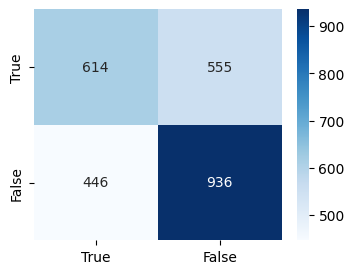

In [39]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_sgd)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [40]:
print("SGD")
build_confusion_matrix(sgd_pipeline)

SGD
Total statements classified: 10240
F1-Score: 0.6604912877075082
Accuracy: 0.60107421875
Confusion matrix:
[[2180 2308]
 [1777 3975]]


***Random Forest Classifier***

<Axes: >

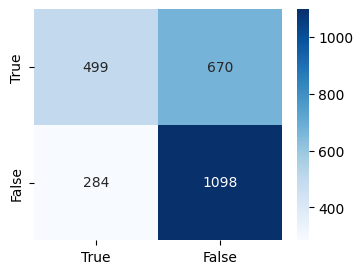

In [41]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_rf)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [42]:
print("Random Forest")
build_confusion_matrix(rf_pipeline)

Random Forest
Total statements classified: 10240
F1-Score: 0.6999200685569519
Accuracy: 0.6203125
Confusion matrix:
[[1817 2671]
 [1217 4535]]


***Passive Aggressive Classifier***

<Axes: >

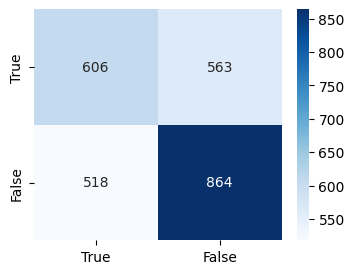

In [43]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_pasAgg)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [44]:
print("Passive Aggressive")
build_confusion_matrix(passAgg_pipeline)

Passive Aggressive
Total statements classified: 10240
F1-Score: 0.5986687213037069
Accuracy: 0.55478515625
Confusion matrix:
[[2279 2209]
 [2350 3402]]




---



# **Building Classifiers / Models - N-Grams Technique (TfidfVectorizer)**


**1. Naive Bayes Classifier**

In [45]:
#Define a pipeline object for Naive Bayes classification
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram), # Use TfidfVectorizer to convert text to numerical features
        ('nb_clf',MultinomialNB())]) # Use Multinomial Naive Bayes as the classifier

#Fit the pipeline on the training set
nb_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_ngrm_nb = np.mean(predicted_nb_ngram == test_news['Label'])
print("Naive Bayes - Tfidf - Accuracy: ", acc_ngrm_nb)
print("Naive Bayes - Tfidf - Accuracy Percentage: ", "{:.2%}".format(acc_ngrm_nb))

# Calculate F1-score and print it
f1_ngrm_nb = f1_score(test_news['Label'], predicted_nb_ngram, average='weighted')
print("Naive Bayes - Ngram - F1-score: ", f1_ngrm_nb)

with open('pkl_ngrm_nb.pkl', 'wb') as f:
    pickle.dump(nb_pipeline_ngram, f)

print("Pickle file *pkl_ngrm_nb.pkl* is ready")

Naive Bayes - Tfidf - Accuracy:  0.5938847510780086
Naive Bayes - Tfidf - Accuracy Percentage:  59.39%
Naive Bayes - Ngram - F1-score:  0.5239191053079216
Pickle file *pkl_ngrm_nb.pkl* is ready


**Accuracy** - The Model created based on TfidfVectorizer tokenizer and Naive Bayes classifier produces **59.3%** of accuracy in predicting news as true news. 

***Classification Report***

In [46]:
print(classification_report(test_news['Label'], predicted_nb_ngram))

              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

    accuracy                           0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551



**2. Linear Regression**

In [47]:
#Define a pipeline object for Logistic Regression classification
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram), # Use TfidfVectorizer to convert text to numerical features
        ('LogR_clf',LogisticRegression(penalty="l2",C=1)) # Use CountVectorizer to convert text to numerical features
        ])

#Fit the pipeline on the training set
logR_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_ngrm_logR = np.mean(predicted_LogR_ngram == test_news['Label'])
print("Logistic Regression - Tfidf - Accuracy: ", acc_ngrm_logR)
print("Logistic Regression - Tfidf - Accuracy Percentage: ", "{:.2%}".format(acc_ngrm_logR))

# Calculate F1-score and print it
f1_ngrm_logR = f1_score(test_news['Label'], predicted_LogR_ngram, average='weighted')
print("Logistic Regression - Ngram - F1-score: ", f1_ngrm_logR)

with open('pkl_ngrm_logR.pkl', 'wb') as f:
    pickle.dump(logR_pipeline_ngram, f)

print("Pickle file *pkl_ngrm_logR.pkl* is ready")

Logistic Regression - Tfidf - Accuracy:  0.6193649549196394
Logistic Regression - Tfidf - Accuracy Percentage:  61.94%
Logistic Regression - Ngram - F1-score:  0.6005760912547761
Pickle file *pkl_ngrm_logR.pkl* is ready


**Accuracy** - The Model created based on TfidfVectorizer tokenizer and Logistic Regression classifier produces **61.9%** of accuracy in predicting news as true news. 

***Classification Report***

In [48]:
print(classification_report(test_news['Label'], predicted_LogR_ngram))

              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



**3. SVM**

In [49]:
#Define a pipeline object for SVM classification
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram), # Use TfidfVectorizer to convert text to numerical features
        ('svm_clf',svm.LinearSVC()) # Use SVM as the classifier
        ])

#Fit the pipeline on the training set
svm_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_ngrm_svm = np.mean(predicted_svm_ngram == test_news['Label'])
print("SVM - Tfidf - Accuracy: ", acc_ngrm_svm)
print("SVM - Tfidf - Accuracy Percentage: ", "{:.2%}".format(acc_ngrm_svm))

# Calculate F1-score and print it
f1_ngrm_svm = f1_score(test_news['Label'], predicted_svm_ngram, average='weighted')
print("SVM - Ngram - F1-score: ", f1_ngrm_svm)

with open('pkl_ngrm_svm.pkl', 'wb') as f:
    pickle.dump(svm_pipeline_ngram, f)

print("Pickle file *pkl_ngrm_svm.pkl* is ready")

SVM - Tfidf - Accuracy:  0.6170129361034888
SVM - Tfidf - Accuracy Percentage:  61.70%
SVM - Ngram - F1-score:  0.6094717253421169
Pickle file *pkl_ngrm_svm.pkl* is ready


**Accuracy** - The Model created based on TfidfVectorizer tokenizer and SVM classifier produces **61.7%** of accuracy in predicting news as true news. 

***Classification Report***

In [50]:
print(classification_report(test_news['Label'], predicted_svm_ngram))

              precision    recall  f1-score   support

       False       0.61      0.47      0.53      1169
        True       0.62      0.74      0.68      1382

    accuracy                           0.62      2551
   macro avg       0.61      0.61      0.60      2551
weighted avg       0.62      0.62      0.61      2551



**4. SGD**

In [51]:
#Define a pipeline object for SGD classification
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',tfidf_ngram), # Use TfidfVectorizer to convert text to numerical features
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3)) # Use SGD as the classifier
         ])

#Fit the pipeline on the training set
sgd_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_ngrm_sgd = np.mean(predicted_sgd_ngram == test_news['Label'])
print("SGD - Tfidf - Accuracy: ", acc_ngrm_sgd)
print("SGD - Tfidf - Accuracy Percentage: ", "{:.2%}".format(acc_ngrm_sgd))

# Calculate F1-score and print it
f1_ngrm_sgd = f1_score(test_news['Label'], predicted_sgd_ngram, average='weighted')
print("SGD - Ngram - F1-score: ", f1_ngrm_sgd)

with open('pkl_ngrm_sgd.pkl', 'wb') as f:
    pickle.dump(sgd_pipeline_ngram, f)

print("Pickle file *pkl_ngrm_sgd.pkl* is ready")

SGD - Tfidf - Accuracy:  0.5417483339866719
SGD - Tfidf - Accuracy Percentage:  54.17%
SGD - Ngram - F1-score:  0.38072524666645335
Pickle file *pkl_ngrm_sgd.pkl* is ready


**Accuracy** - The Model created based on TfidfVectorizer tokenizer and SGD classifier produces **54.1%** of accuracy in predicting news as true news. 

***Classification Report***

In [52]:
print(classification_report(test_news['Label'], predicted_sgd_ngram))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

    accuracy                           0.54      2551
   macro avg       0.27      0.50      0.35      2551
weighted avg       0.29      0.54      0.38      2551



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5. Random Forest**

In [53]:
#Define a pipeline object for Random Forest classification
rf_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram), # Use TfidfVectorizer to convert text to numerical features
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3)) # Use Random Forest as the classifier
        ])
    
#Fit the pipeline on the training set
rf_ngram.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_rf_ngram = rf_ngram.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_ngrm_rf = np.mean(predicted_rf_ngram == test_news['Label'])
print("Random Forest - Tfidf - Accuracy: ", acc_ngrm_rf)
print("Random Forest - Tfidf - Accuracy Percentage: ", "{:.2%}".format(acc_ngrm_rf))

# Calculate F1-score and print it
f1_ngrm_rf = f1_score(test_news['Label'], predicted_rf_ngram, average='weighted')
print("Random Forest - Ngram - F1-score: ", f1_ngrm_rf)

with open('pkl_ngrm_rf.pkl', 'wb') as f:
    pickle.dump(rf_ngram, f)

print("Pickle file *pkl_ngrm_rf.pkl* is ready")

Random Forest - Tfidf - Accuracy:  0.6064288514308115
Random Forest - Tfidf - Accuracy Percentage:  60.64%
Random Forest - Ngram - F1-score:  0.6008241580534249
Pickle file *pkl_ngrm_rf.pkl* is ready


**Accuracy** - The Model created based on TfidfVectorizer tokenizer and Random Forest classifier produces **60.1%** of accuracy in predicting news as true news. 

***Classification Report***

In [54]:
print(classification_report(test_news['Label'], predicted_rf_ngram))

              precision    recall  f1-score   support

       False       0.59      0.48      0.53      1169
        True       0.62      0.71      0.66      1382

    accuracy                           0.61      2551
   macro avg       0.60      0.60      0.60      2551
weighted avg       0.60      0.61      0.60      2551



**6. Passive Aggressive**

In [55]:
#Define a pipeline object for Passive Aggressive classification
pasAgg_ngram = Pipeline([
        ('PACV',countV), # Use CountVectorizer to convert text to numerical features
        ('pa_clf',PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None, early_stopping=False, fit_intercept=True, loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None, random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)) # Use Passive Aggressive as the classifier
        ])
    
#Fit the pipeline on the training set
pasAgg_ngram.fit(train_news['Statement'],train_news['Label'])

#Use the fitted pipeline to make predictions on the test set
predicted_pasAgg_ngram = pasAgg_ngram.predict(test_news['Statement'])

#Calculate the accuracy of the predictions by comparing with the true labels of the test set
acc_ngrm_passAgg = np.mean(predicted_pasAgg_ngram == test_news['Label'])
print("Random Forest - Tfidf - Accuracy: ", acc_ngrm_passAgg)
print("Random Forest - Tfidf - Accuracy Percentage: ", "{:.2%}".format(acc_ngrm_passAgg))

# Calculate F1-score and print it
f1_ngrm_passAgg = f1_score(test_news['Label'], predicted_pasAgg_ngram, average='weighted')
print("Passive Aggressive - Ngram - F1-score: ", f1_ngrm_passAgg)

with open('pkl_ngrm_passAgg.pkl', 'wb') as f:
    pickle.dump(pasAgg_ngram, f)

print("Pickle file *pkl_ngrm_passAgg.pkl* is ready")

Random Forest - Tfidf - Accuracy:  0.5782046256370051
Random Forest - Tfidf - Accuracy Percentage:  57.82%
Passive Aggressive - Ngram - F1-score:  0.5755696870686366
Pickle file *pkl_ngrm_passAgg.pkl* is ready


**Accuracy** - The Model created based on TfidfVectorizer tokenizer and Passive Aggressive classifier produces **57.43%** of accuracy in predicting news as true news. 

***Classification Report***

In [56]:
print(classification_report(test_news['Label'], predicted_pasAgg_ngram))

              precision    recall  f1-score   support

       False       0.54      0.49      0.51      1169
        True       0.60      0.65      0.63      1382

    accuracy                           0.58      2551
   macro avg       0.57      0.57      0.57      2551
weighted avg       0.58      0.58      0.58      2551





---



# ***K-fold Cross Validation for all classifiers***

***Naive Bayes Classifier***

<Axes: >

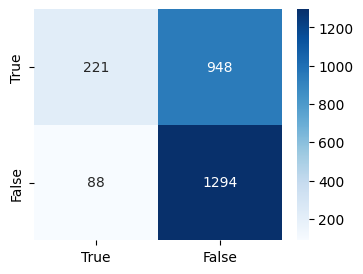

In [57]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_nb_ngram)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [58]:
print("Naive Bayes")
build_confusion_matrix(nb_pipeline_ngram)

Naive Bayes
Total statements classified: 10240
F1-Score: 0.7224053159841455
Accuracy: 0.59765625
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]


***Logistic Regressiom Classifier***

<Axes: >

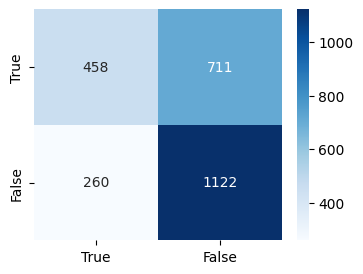

In [59]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_LogR_ngram)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [60]:
print("Logistic Regression")
build_confusion_matrix(logR_pipeline_ngram)

Logistic Regression
Total statements classified: 10240
F1-Score: 0.7044355553757985
Accuracy: 0.61416015625
Confusion matrix:
[[1580 2908]
 [1043 4709]]


***SVM Classifier***

<Axes: >

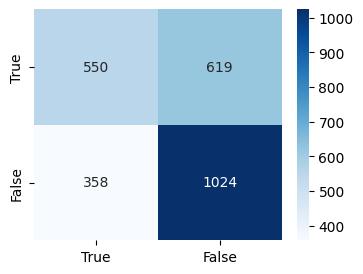

In [61]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_svm_ngram)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [62]:
print("SVM")
build_confusion_matrix(svm_pipeline_ngram)

SVM
Total statements classified: 10240
F1-Score: 0.6790920142902143
Accuracy: 0.609765625
Confusion matrix:
[[2016 2472]
 [1524 4228]]


***SGD Classifier***

<Axes: >

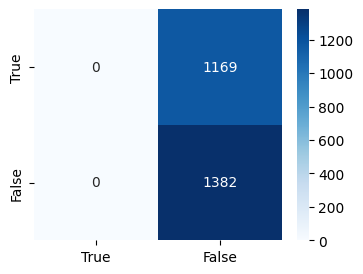

In [63]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_sgd_ngram)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [64]:
print("SGD")
build_confusion_matrix(sgd_pipeline_ngram)

SGD
Total statements classified: 10240
F1-Score: 0.7190643331130575
Accuracy: 0.56162109375
Confusion matrix:
[[   5 4483]
 [   6 5746]]


***Random Forest Classifier***

<Axes: >

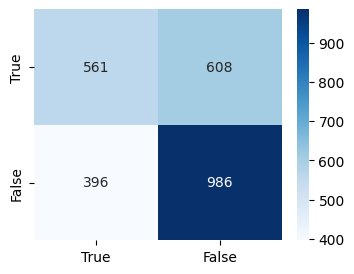

In [65]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_rf_ngram)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [66]:
print("Random Forest")
build_confusion_matrix(rf_ngram)

Random Forest
Total statements classified: 10240
F1-Score: 0.6607774192700245
Accuracy: 0.59267578125
Confusion matrix:
[[2006 2482]
 [1689 4063]]


***Passive Aggressive Classifier***

<Axes: >

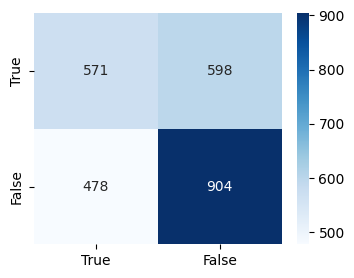

In [67]:
#Create a confusion matrix
cm = confusion_matrix(test_news['Label'], predicted_pasAgg_ngram)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])

In [68]:
print("Passive Aggressive")
build_confusion_matrix(pasAgg_ngram)

Passive Aggressive
Total statements classified: 10240
F1-Score: 0.5972254551480749
Accuracy: 0.55322265625
Confusion matrix:
[[2270 2218]
 [2357 3395]]


# ***END OF BUILDING MODELS***

---



# **Model Comparison**

***Compare models to visualize all models***

Reference: https://colab.research.google.com/drive/1Tmqs4934VEE2xMdQlCiYwY-GhQsakL_n#scrollTo=-JbHzHy6oEix

Data Professor YouTube channel, http://youtube.com/dataprofessor

### ***Tabular comparison***

In [69]:
model_names = ["Naive Bayes - CV", "Logistic Regression - CV", "SVM - CV", "SGD - CV", "Random Forest - CV", "Passive Aggressive - CV", "Naive Bayes - Tfidf", "Logistic Regression - Tfidf", "SVM - Tfidf", "SGD - Tfidf", "Random Forest - Tfidf", "Passive Aggressive - Tfidf"]
accuracies = [acc_cv_nb, acc_cv_LogR, acc_cv_svm, acc_cv_sgd, acc_cv_rf, acc_cv_pasAgg, acc_ngrm_nb, acc_ngrm_logR, acc_ngrm_svm, acc_ngrm_sgd, acc_ngrm_rf, acc_ngrm_passAgg]
f1_scores = [f1_cv_nb, f1_cv_logR, f1_cv_svm, f1_cv_sgd, f1_cv_rf, f1_cv_passAgg, f1_ngrm_nb, f1_ngrm_logR, f1_ngrm_svm, f1_ngrm_sgd, f1_ngrm_rf, f1_ngrm_passAgg]

df = pd.DataFrame()
df['Model'] = model_names
df['F1-scores'] = f1_scores
df['F1-score percentage'] = [f'{f1_score*100:.2f}%' for f1_score in f1_scores]
df['Accuracy score'] = accuracies
df['Accuracy percentage'] = [f'{score*100:.2f}%' for score in accuracies]
df

#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("blue", as_cmap=True)
graphs = df.sort_values('F1-scores', ascending=False).style.background_gradient(cmap=cm)
graphs

,Model,F1-scores,F1-score percentage,Accuracy score,Accuracy percentage
4,Random Forest - CV,0.611967,61.20%,0.626029,62.60%
8,SVM - Tfidf,0.609472,60.95%,0.617013,61.70%
0,Naive Bayes - CV,0.602621,60.26%,0.607213,60.72%
10,Random Forest - Tfidf,0.600824,60.08%,0.606429,60.64%
7,Logistic Regression - Tfidf,0.600576,60.06%,0.619365,61.94%
1,Logistic Regression - CV,0.599308,59.93%,0.601333,60.13%
11,Passive Aggressive - Tfidf,0.575570,57.56%,0.578205,57.82%
5,Passive Aggressive - CV,0.575481,57.55%,0.576245,57.62%
2,SVM - CV,0.571672,57.17%,0.572325,57.23%
3,SGD - CV,0.571672,57.17%,0.607605,60.76%


### ***Graph comparison***

**F1-Scores**

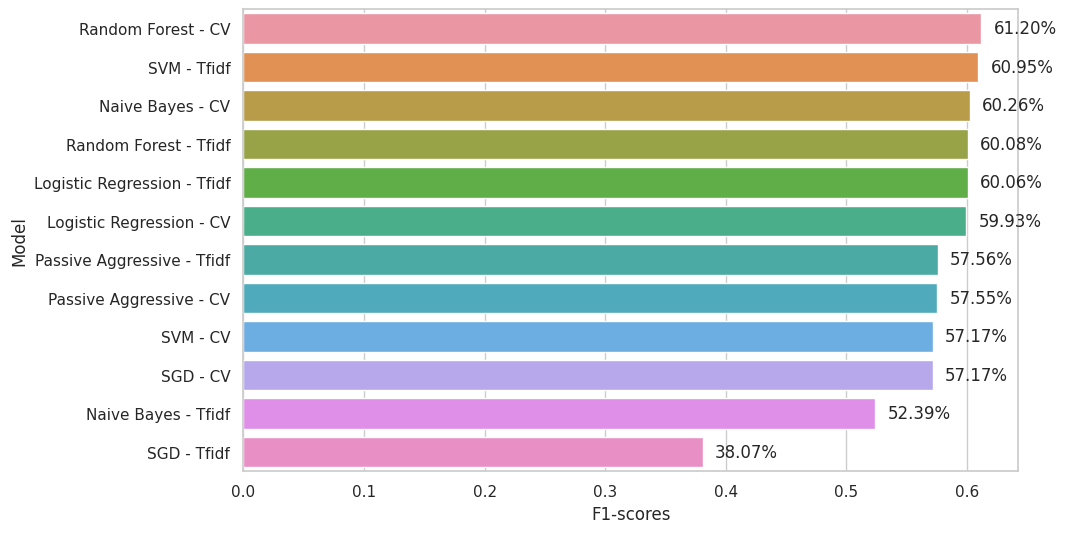

In [70]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
df_sorted = df.sort_values('F1-scores', ascending=False)
ax = sns.barplot(y="Model", x="F1-scores", data=df_sorted)

# Add scores to the barplot
for i, score in enumerate(df_sorted['F1-scores']):
    ax.annotate(f'{score:.2%}', xy=(score+0.01, i), va='center')

**Accuracy Scores**

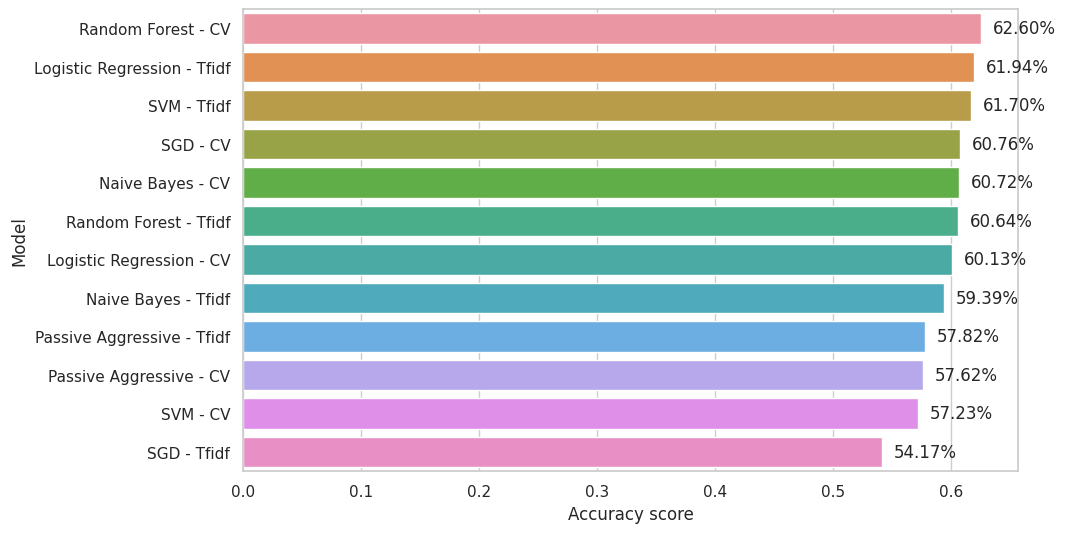

In [71]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
df_sorted = df.sort_values('Accuracy score', ascending=False)
ax = sns.barplot(y="Model", x="Accuracy score", data=df_sorted)

# Add scores to the barplot
for i, score in enumerate(df_sorted['Accuracy score']):
    ax.annotate(f'{score:.2%}', xy=(score+0.01, i), va='center')

**F1-Score and Accuracy Score both together**

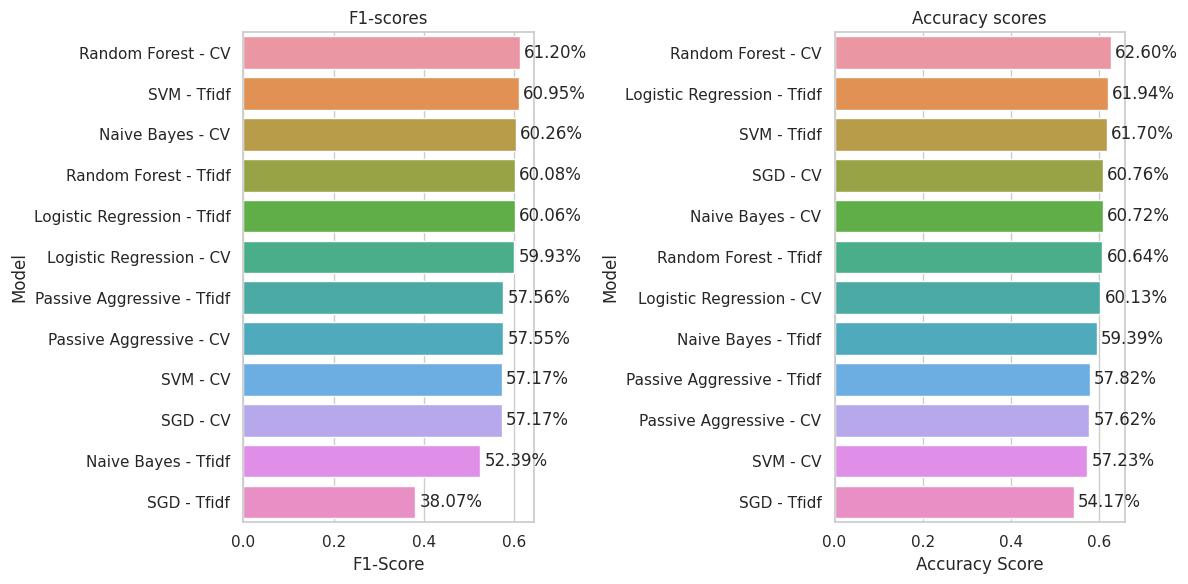

In [72]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot the first bar plot on the first subplot
df_sorted_f1 = df.sort_values('F1-scores', ascending=False)
sns.barplot(x='F1-scores', y='Model', data=df_sorted_f1, ax=ax1)

# Add F1-scores to the first bar plot
for i, score in enumerate(df_sorted_f1['F1-scores']):
    ax1.annotate(f'{score:.2%}', xy=(score+0.01, i), va='center')

# Plot the second bar plot on the second subplot
df_sorted_acc = df.sort_values('Accuracy score', ascending=False)
sns.barplot(x='Accuracy score', y='Model', data=df_sorted_acc, ax=ax2)

# Add Accuracy scores to the second bar plot
for i, score in enumerate(df_sorted_acc['Accuracy score']):
    ax2.annotate(f'{score:.2%}', xy=(score+0.01, i), va='center')

# Set the titles and labels
ax1.set_title('F1-scores')
ax1.set_xlabel('F1-Score')
ax1.set_ylabel('Model')
ax2.set_title('Accuracy scores')
ax2.set_xlabel('Accuracy Score')
ax2.set_ylabel('Model')

# Adjust the spacing between the subplots
fig.tight_layout()

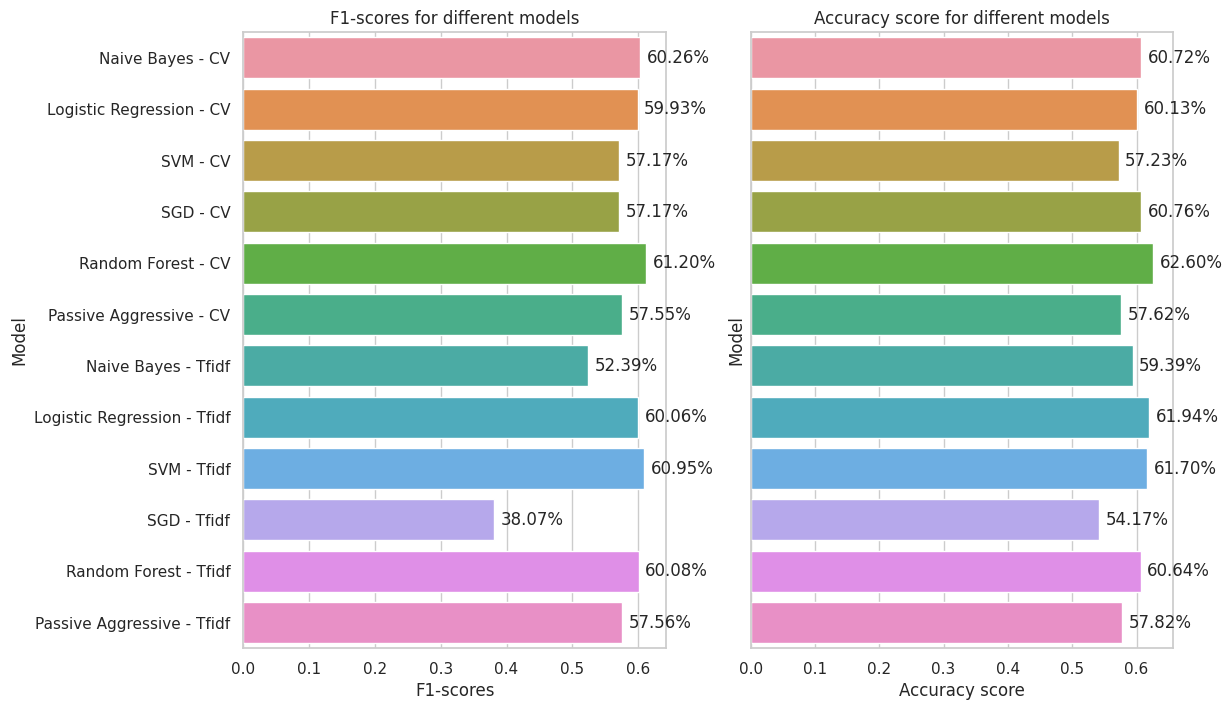

In [73]:
sns.set(style="whitegrid")

# Create subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 8))

# Create barplots
sns.barplot(x="F1-scores", y="Model", data=df, ax=ax1)
sns.barplot(x="Accuracy score", y="Model", data=df, ax=ax2)

# Add scores to the barplots
for i, score in enumerate(df['F1-scores']):
    ax1.annotate(f'{score:.2%}', xy=(score+0.01, i), va='center')
    
for i, score in enumerate(df['Accuracy score']):
    ax2.annotate(f'{score:.2%}', xy=(score+0.01, i), va='center')

# Set axis labels and titles
ax1.set_xlabel('F1-scores')
ax2.set_xlabel('Accuracy score')
ax1.set_ylabel('Model')
ax1.set_title('F1-scores for different models')
ax2.set_title('Accuracy score for different models')

plt.show()

### ***Bar chart comparison***

**F1-Scores**

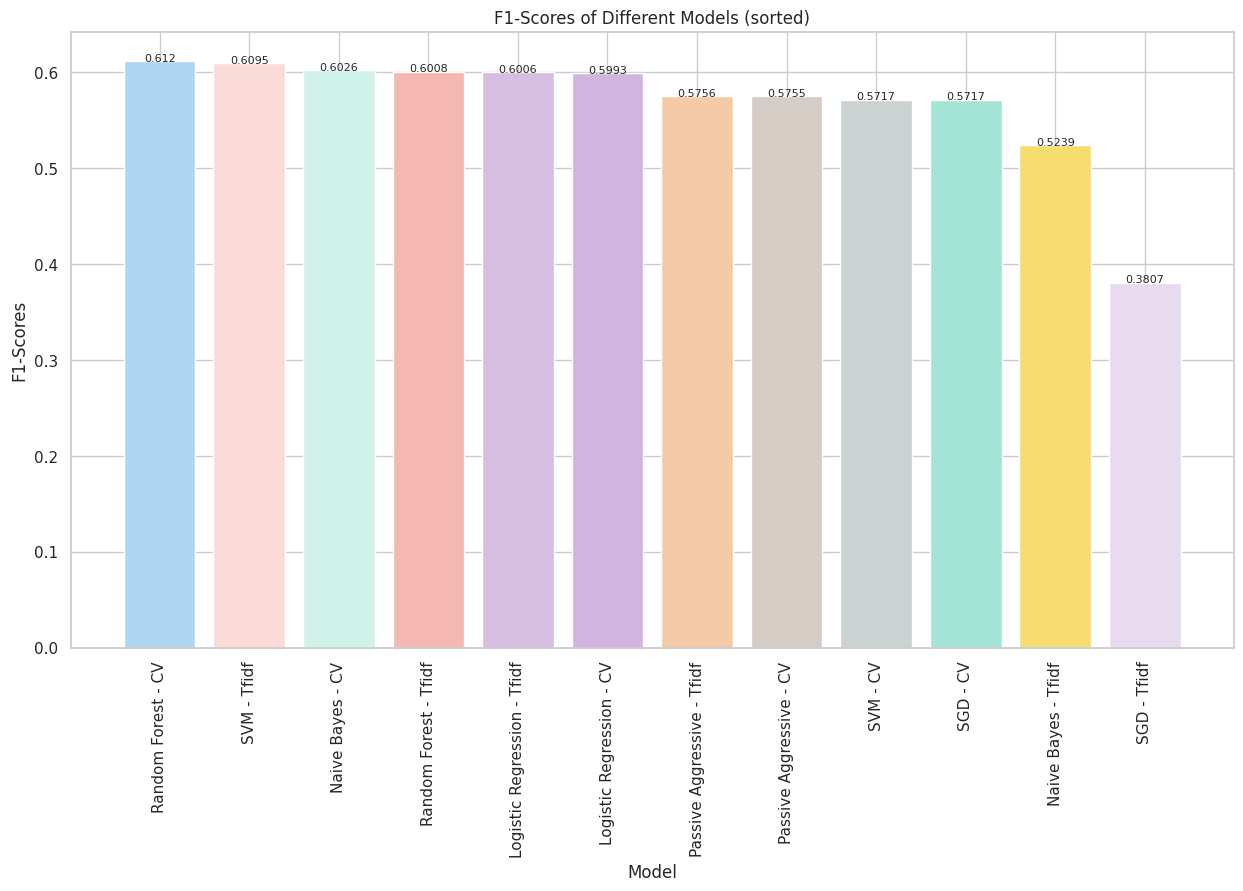

In [74]:
model_names = ["Naive Bayes - CV", "Logistic Regression - CV", "SVM - CV", "SGD - CV", "Random Forest - CV", "Passive Aggressive - CV", "Naive Bayes - Tfidf", "Logistic Regression - Tfidf", "SVM - Tfidf", "SGD - Tfidf", "Random Forest - Tfidf", "Passive Aggressive - Tfidf"]
f1_scores = [f1_cv_nb, f1_cv_logR, f1_cv_svm, f1_cv_sgd, f1_cv_rf, f1_cv_passAgg, f1_ngrm_nb, f1_ngrm_logR, f1_ngrm_svm, f1_ngrm_sgd, f1_ngrm_rf, f1_ngrm_passAgg]

# Sort the lists based on the values in f1-scores in descending order
sorted_indices = sorted(range(len(f1_scores)), key=lambda k: f1_scores[k], reverse=True)
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_f1_scores = [f1_scores[i] for i in sorted_indices]

# Set colors for each bar
colors = ['#AED6F1', '#FADBD8', '#D1F2EB', '#F5B7B1', '#D7BDE2', '#D2B4DE', '#F5CBA7', '#D4CCC5', '#CCD1D1', '#A3E4D7', '#F7DC6F', '#E8DAEF']

plt.figure(figsize=(15, 8))
plt.bar(sorted_model_names, sorted_f1_scores, color=colors)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("F1-Scores")
plt.title("F1-Scores of Different Models (sorted)")

# Add text labels for the values above each bar
for i, v in enumerate(sorted_f1_scores):
    plt.text(i, v, str(np.round(v, 4)), ha='center', fontsize=8)

plt.show()

**Accuracies**

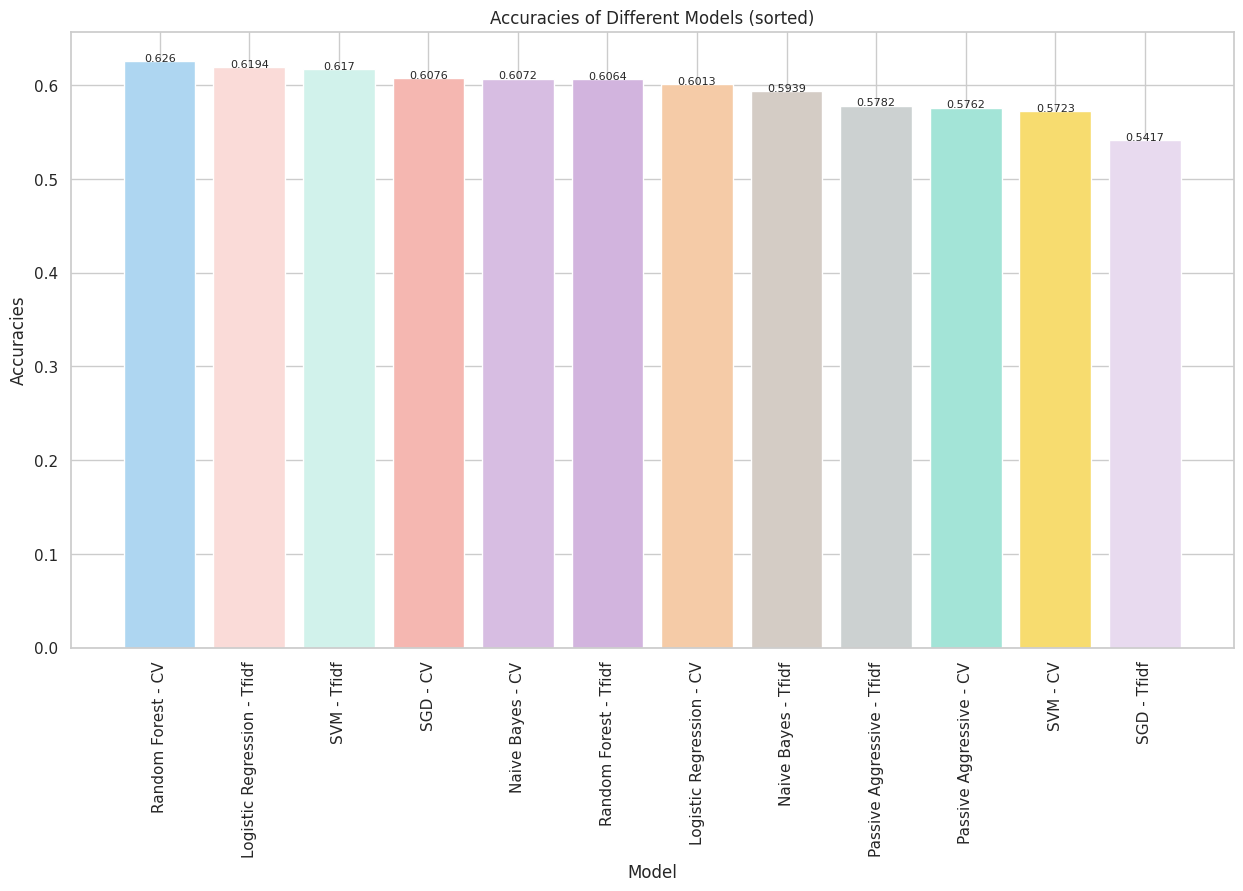

In [75]:
model_names = ["Naive Bayes - CV", "Logistic Regression - CV", "SVM - CV", "SGD - CV", "Random Forest - CV", "Passive Aggressive - CV", "Naive Bayes - Tfidf", "Logistic Regression - Tfidf", "SVM - Tfidf", "SGD - Tfidf", "Random Forest - Tfidf", "Passive Aggressive - Tfidf"]
accuracies = [acc_cv_nb, acc_cv_LogR, acc_cv_svm, acc_cv_sgd, acc_cv_rf, acc_cv_pasAgg, acc_ngrm_nb, acc_ngrm_logR, acc_ngrm_svm, acc_ngrm_sgd, acc_ngrm_rf, acc_ngrm_passAgg]

# Sort the lists based on the values in accuracies in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Set colors for each bar
colors = ['#AED6F1', '#FADBD8', '#D1F2EB', '#F5B7B1', '#D7BDE2', '#D2B4DE', '#F5CBA7', '#D4CCC5', '#CCD1D1', '#A3E4D7', '#F7DC6F', '#E8DAEF']

plt.figure(figsize=(15, 8))
plt.bar(sorted_model_names, sorted_accuracies, color=colors)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("Accuracies")
plt.title("Accuracies of Different Models (sorted)")

# Add text labels for the values above each bar
for i, v in enumerate(sorted_accuracies):
    plt.text(i, v, str(np.round(v, 4)), ha='center', fontsize=8)

plt.show()



---



# *Combine Multiple Pickle files into One Pickle file*
This is not a mandatory step in this project. It is just to demonstrate the ability to combine multiple pickle files and into one pickle file and unpickle all files.

Reference: Tutorials in Sinhala (Native Language) - Pickle - https://www.youtube.com/watch?v=D-zT4tqbebQ&t=2s

In [76]:
# List of file names to be combined, Code Reference: https://github.com/open-mmlab/mmaction2/issues/1431
file_list = ['pkl_cv_nb.pkl', 'pkl_cv_logR.pkl', 'pkl_cv_svm.pkl', 'pkl_cv_sgd.pkl', 'pkl_cv_rf.pkl', 'pkl_cv_passAgg.pkl', 'pkl_ngrm_nb.pkl', 'pkl_ngrm_logR.pkl', 'pkl_ngrm_svm.pkl', 'pkl_ngrm_sgd.pkl', 'pkl_ngrm_rf.pkl', 'pkl_ngrm_passAgg.pkl']

# Initialize an empty list to hold the data from the pickle files
data = []

# Loop through the file names and load each file's data into the data list
for file_name in file_list:
    with open(file_name, 'rb') as f:
        file_data = pickle.load(f)
        data.append(file_data)

# Write the combined data to a new pickle file
with open('msc_proj_fake_news.pkl', 'wb') as f:
    pickle.dump(data, f)

print("Pickle model *msc_proj_fake_news.pkl* is ready now")

Pickle model *msc_proj_fake_news.pkl* is ready now


***Unpickle combined model***

In [77]:
all_pickle = pickle.load(open('msc_proj_fake_news.pkl', 'rb'))
print(all_pickle)

[Pipeline(steps=[('NBCV', CountVectorizer()), ('nb_clf', MultinomialNB())]), Pipeline(steps=[('LogRCV', CountVectorizer()),
                ('LogR_clf', LogisticRegression())]), Pipeline(steps=[('svmCV', CountVectorizer()), ('svm_clf', LinearSVC())]), Pipeline(steps=[('sgdCV', CountVectorizer()),
                ('sgd_clf', SGDClassifier(alpha=0.001))]), Pipeline(steps=[('rfCV', CountVectorizer()),
                ('rf_clf', RandomForestClassifier(n_estimators=200, n_jobs=3))]), Pipeline(steps=[('PACV', CountVectorizer()),
                ('pa_clf', PassiveAggressiveClassifier())]), Pipeline(steps=[('nb_tfidf',
                 TfidfVectorizer(ngram_range=(1, 4), stop_words='english')),
                ('nb_clf', MultinomialNB())]), Pipeline(steps=[('LogR_tfidf',
                 TfidfVectorizer(ngram_range=(1, 4), stop_words='english')),
                ('LogR_clf', LogisticRegression(C=1))]), Pipeline(steps=[('svm_tfidf',
                 TfidfVectorizer(ngram_range=(1, 4), stop_word

# **Testing all models Pickle files**

In [78]:
# Load the pickle models
# Code Reference: https://github.com/nishitpatel01/Fake_News_Detection/blob/master/final-fnd.ipynb
cv_nb = pickle.load(open('pkl_cv_nb.pkl', 'rb'))
cv_logR = pickle.load(open('pkl_cv_logR.pkl', 'rb'))
cv_svm = pickle.load(open('pkl_cv_svm.pkl', 'rb'))
cv_sgd = pickle.load(open('pkl_cv_sgd.pkl', 'rb'))
cv_rf = pickle.load(open('pkl_cv_rf.pkl', 'rb'))
cv_passAgg = pickle.load(open('pkl_cv_passAgg.pkl', 'rb'))
ngrm_nb = pickle.load(open('pkl_ngrm_nb.pkl', 'rb'))
ngrm_logR = pickle.load(open('pkl_ngrm_logR.pkl', 'rb'))
ngrm_svm = pickle.load(open('pkl_ngrm_svm.pkl', 'rb'))
ngrm_sgd = pickle.load(open('pkl_ngrm_sgd.pkl', 'rb'))
ngrm_rf = pickle.load(open('pkl_ngrm_rf.pkl', 'rb'))
ngrm_passAgg = pickle.load(open('pkl_ngrm_passAgg.pkl', 'rb'))

In [79]:
# Define a function to preprocess the news article text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    return ' '.join(tokens)

In [80]:
def classify_news(article):
  count_true = 0
  count_false = 0
  total_count = 0
  preprocessed_article = preprocess_text(article)
  
  print("\n")
  # Use each of the models to predict the class of the article
  # Code Reference (Color change): https://www.studytonight.com/python-howtos/how-to-print-colored-text-in-python?utm_content=cmp-true, https://gist.github.com/rene-d/9e584a7dd2935d0f461904b9f2950007
  cv_nb_prediction = cv_nb.predict([preprocessed_article])[0]
  total_count += 1
  if cv_nb_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Naive Bayes classifier and CountVectorizer: \033[34m{cv_nb_prediction}\033[0m")
  else:
    count_false += 1
    print(f"Prediction using Naive Bayes classifier and CountVectorizer: \033[31m{cv_nb_prediction}\033[0m")

  cv_logR_prediction = cv_logR.predict([preprocessed_article])[0]
  total_count += 1
  if cv_logR_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Logical Regression classifier and CountVectorizer: \033[34m{cv_logR_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using Logical Regression  classifier and CountVectorizer: \033[31m{cv_logR_prediction}\033[0m")

  cv_svm_prediction = cv_svm.predict([preprocessed_article])[0]
  total_count += 1
  if cv_svm_prediction == 1: # true
    count_true += 1
    print(f"Prediction using SVM classifier and CountVectorizer: \033[34m{cv_svm_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using SVM classifier and CountVectorizer: \033[31m{cv_svm_prediction}\033[0m")

  cv_sgd_prediction = cv_sgd.predict([preprocessed_article])[0]
  total_count += 1
  if cv_sgd_prediction == 1: # true
    count_true += 1
    print(f"Prediction using SGD classifier and CountVectorizer: \033[34m{cv_sgd_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using SGD classifier and CountVectorizer: \033[31m{cv_sgd_prediction}\033[0m")

  cv_rf_prediction = cv_rf.predict([preprocessed_article])[0]
  total_count += 1
  if cv_rf_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Random Forest classifier and CountVectorizer: \033[34m{cv_rf_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using Random Forest classifier and CountVectorizer: \033[31m{cv_rf_prediction}\033[0m")

  cv_passAgg_prediction = cv_passAgg.predict([preprocessed_article])[0]
  total_count += 1
  if cv_passAgg_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Passive Aggressive classifier and CountVectorizer: \033[34m{cv_passAgg_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using Passive Aggressive classifier and CountVectorizer: \033[31m{cv_passAgg_prediction}\033[0m")

  ngrm_nb_prediction = ngrm_nb.predict([preprocessed_article])[0]
  total_count += 1
  if ngrm_nb_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Naive Bayes classifier and TfidfVectorizer: \033[34m{ngrm_nb_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using Naive Bayes classifier and TfidfVectorizer: \033[31m{ngrm_nb_prediction}\033[0m")

  ngrm_logR_prediction = ngrm_logR.predict([preprocessed_article])[0]
  total_count += 1
  if ngrm_logR_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Logical Regression classifier and TfidfVectorizer: \033[34m{ngrm_logR_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using Logical Regression classifier and TfidfVectorizer: \033[31m{ngrm_logR_prediction}\033[0m")

  ngrm_svm_prediction = ngrm_svm.predict([preprocessed_article])[0]
  total_count += 1
  if ngrm_svm_prediction == 1: # true
    count_true += 1
    print(f"Prediction using SVM classifier and TfidfVectorizer: \033[34m{ngrm_svm_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using SVM classifier and TfidfVectorizer: \033[31m{ngrm_svm_prediction}\033[0m")

  ngrm_sgd_prediction = ngrm_sgd.predict([preprocessed_article])[0]
  total_count += 1
  if ngrm_sgd_prediction == 1: # true
    count_true += 1
    print(f"Prediction using SGD classifier and TfidfVectorizer: \033[34m{ngrm_sgd_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using SGD classifier and TfidfVectorizer: \033[31m{ngrm_sgd_prediction}\033[0m")

  ngrm_rf_prediction = ngrm_rf.predict([preprocessed_article])[0]
  total_count += 1
  if ngrm_rf_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Random Forest classifier and TfidfVectorizer: \033[34m{ngrm_rf_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using Random Forest classifier and TfidfVectorizer: \033[31m{ngrm_rf_prediction}\033[0m")

  ngrm_passAgg_prediction = ngrm_passAgg.predict([preprocessed_article])[0]
  total_count += 1
  if ngrm_passAgg_prediction == 1: # true
    count_true += 1
    print(f"Prediction using Passive Aggressive classifier and TfidfVectorizer: \033[34m{ngrm_passAgg_prediction}\033[0m")
  else: # false
    count_false += 1
    print(f"Prediction using Passive Aggressive classifier and TfidfVectorizer: \033[31m{ngrm_passAgg_prediction}\033[0m")

  print("\n")
  print("How many models predicts this news as True?:", count_true)
  print("How many models predicts this news as False?:", count_false)

  # Calculate the overall percentage of the news article being true
  percentage_true = (count_true/total_count) * 100
  percentage_false = (count_false/total_count) * 100
  print("\nThe entered news is", percentage_true, "% TRUE and", percentage_false , "% FAKE according to all models\n")

  print("News accuracy above or equal to 75% is Trustworthy news")
  print("News accuracy above or equal to 60% is Average Trustworthy news")
  print("News accuracy below 60% is Untrustworthy and FAKE news")

  print("\nFinal prediction:")

  # Accuracy above 75% trustworthy news, above 60% ok news, below 60% untrustworthy news
  if percentage_true >= 75:
      print("\033[0;32mThis news can be identified as a TRUSTWORTHY news article.")
  elif percentage_true >= 60:
      print("\033[0;33mThis news can be identified as an AVERAGE TRUSTWORTHY news article.")
  else: # false
      print("\033[0;31mThis news can be identified as an UNTRUSTWORTHY and FAKE news article.")

  print("\n")
  # Set plot size and pastel colors
  plt.rcParams["figure.figsize"] = (3,2)
  colors = ['#66b3ff', '#ff9999']

  # Create a bar plot
  plt.bar(['True', 'False'], [percentage_true, percentage_false], color=colors)
  plt.title('Accuracy Distribution\n', fontsize=12)
  plt.xlabel('Prediction')
  plt.ylabel('Percentage')
  # Add percentages on top of each bar
  plt.text(0, percentage_true+2, f'{percentage_true:.1f}%', ha='center', fontsize=8)
  plt.text(1, percentage_false+2, f'{percentage_false:.1f}%', ha='center', fontsize=8)
  plt.show()

# **Real World News**

Enter News:
A mini-heatwave is set to sweep across the UK with forecasters predicting temperatures above the 20C mark in just a matter of weeks.  The Met Office says a hot, humid plume of air arriving from Spain and France will mean temperatures will heat up towards the end of April.   In the days leading up to the King's Coronation, Britain is set to bask in warm, sunny weather in a "strong push into summer", according to the Met Office long-range forecast.  The national weather service said: "Temperatures likely rather warm to warm towards the end of the month, especially in the west and northwest."  The South West-based forecasters also add some eastern coasts may stay cooler, and possibly chilly overnight in sheltered parts.  A long-range forecast for May 1 to May 15 states that in general "there is a great chance of a settled weather regime, maintaining the likelihood of clearer and drier conditions".  Met Office spokesperson Stephen Dixon said: "Things are due to settle down for 

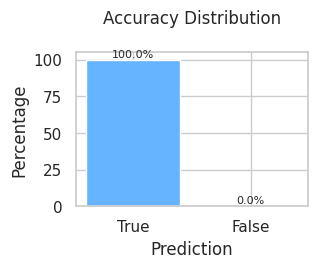

In [82]:
newsarticle = input("Enter News:\n")
newsarticle = preprocess_text(newsarticle)
predictions = classify_news(newsarticle)

The models can predict news of any domain, it is not restricted to a particular domain.